RANDOM FORESTS

1. Libraries and Data Importation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
!pip install --upgrade --break-system-packages mord

In [3]:
from mord import OrdinalRidge

In [8]:
df = pd.read_csv("Student_performance_data_new_GradeClass.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,totalActivities
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1,1
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,1,1
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,4,1
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,4,2


In [ ]:
numeric_columns_new = df.select_dtypes(include=['number']).drop(['StudentID', 'GPA', 'Age','Extracurricular', 'Sports', 'Music', 'Volunteering', 'totalActivities'], axis=1).columns
numeric_columns_new 


Index(['Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'GradeClass'],
      dtype='object')

In [ ]:
X = df.drop(columns=["StudentID", "GradeClass", "GPA"])
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,totalActivities
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,1
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,1
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,2


In [ ]:
y = df["GradeClass"]
y

0       2
1       1
2       4
3       3
4       4
       ..
2387    1
2388    1
2389    4
2390    4
2391    3
Name: GradeClass, Length: 2392, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
np.bincount(y_train) #compte le # d'occurences 

array([  61,  195,  305,  327, 1025], dtype=int64)

In [ ]:
5*np.bincount(y_train)

array([ 305,  975, 1525, 1635, 5125], dtype=int64)

In [ ]:
len(y_train)

1913

2. Compoting the classes' weights

In [ ]:
class_weights = len(y_train) / (5 * np.bincount(y_train))
class_weights = dict(enumerate(class_weights, 0))
class_weights

{0: 6.272131147540984,
 1: 1.962051282051282,
 2: 1.2544262295081967,
 3: 1.1700305810397553,
 4: 0.3732682926829268}

3. Classical Random Forest (taking into account the weights but not the fact that the variable is ordinal)

In [ ]:
# Modèle Random Forest + ajout des poids de classe
model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)

In [ ]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([4, 2, 4, 1, 4, 3, 4, 4, 3, 4, 2, 4, 2, 3, 3, 4, 4, 4, 4, 3, 3, 4,
       4, 1, 4, 4, 3, 2, 4, 4, 4, 4, 2, 1, 4, 4, 1, 1, 2, 4, 2, 1, 4, 2,
       4, 2, 2, 4, 2, 4, 1, 1, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 3, 4, 4, 2,
       1, 2, 4, 1, 0, 4, 1, 2, 4, 2, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 0, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 3, 2, 4, 0,
       2, 4, 4, 4, 3, 4, 4, 4, 3, 3, 1, 4, 1, 4, 4, 3, 2, 4, 2, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 1, 2, 4, 4, 3,
       2, 4, 4, 4, 2, 4, 4, 1, 1, 1, 2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3,
       2, 2, 4, 2, 4, 2, 2, 3, 4, 1, 3, 4, 4, 4, 3, 2, 2, 4, 2, 2, 4, 2,
       4, 3, 1, 4, 4, 4, 1, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 1, 4,
       4, 3, 4, 4, 3, 4, 4, 4, 4, 1, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 2, 4, 2, 3, 4, 1, 4, 4, 4, 2, 4, 4, 4, 2, 1, 2, 4, 4, 1, 3,
       4, 4, 4, 4, 1, 4, 2, 4, 3, 4, 2, 4, 4, 2, 2,

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.53      0.57      0.55        49
           2       0.53      0.61      0.57        80
           3       0.60      0.47      0.53        85
           4       0.90      0.95      0.93       249

    accuracy                           0.75       479
   macro avg       0.66      0.56      0.57       479
weighted avg       0.74      0.75      0.74       479



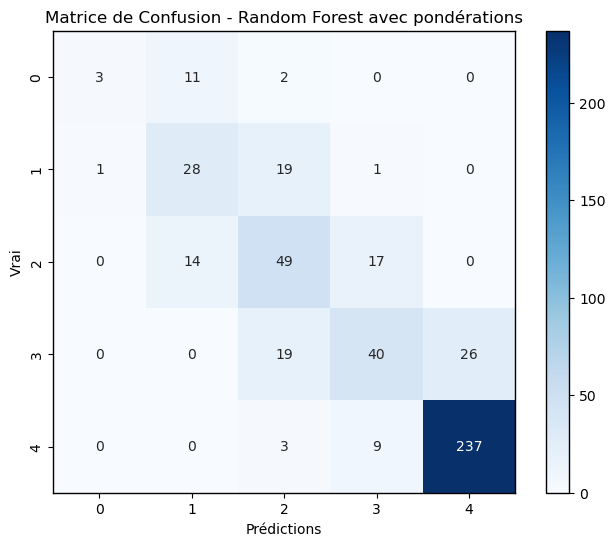

In [ ]:
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=True, square=True, ax=ax)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('black')

cbar = ax.collections[0].colorbar
cbar.outline.set_linewidth(1)
cbar.outline.set_edgecolor('black')

ax.set_xlabel('Prédictions')
ax.set_ylabel('Vrai')
ax.set_title('Matrice de Confusion - Random Forest avec pondérations')
plt.savefig("mat_conf_rf_pond.pdf")
plt.show()


4. Random Forest taking into account the ordinal variable (impossible to add weights)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = OrdinalRidge()
model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.50      0.27      0.35        49
           2       0.55      0.93      0.69        80
           3       0.43      0.74      0.55        85
           4       1.00      0.69      0.82       249

    accuracy                           0.67       479
   macro avg       0.50      0.53      0.48       479
weighted avg       0.74      0.67      0.67       479



c:\Users\romal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
c:\Users\romal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\romal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\romal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

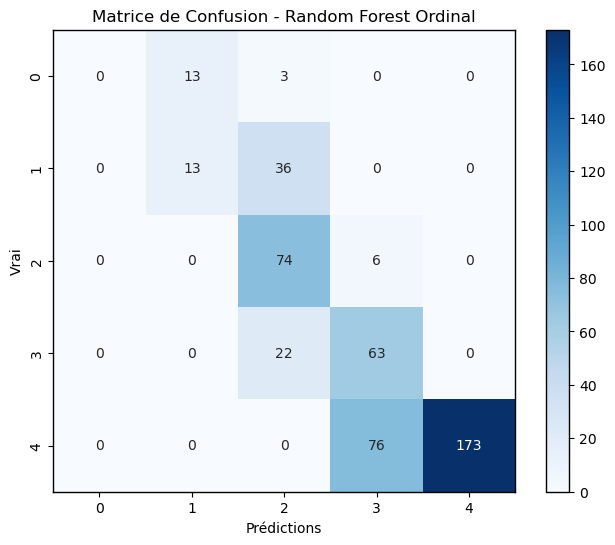

In [ ]:
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=True, square=True, ax=ax)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('black')

cbar = ax.collections[0].colorbar
cbar.outline.set_linewidth(1)
cbar.outline.set_edgecolor('black')

ax.set_xlabel('Prédictions')
ax.set_ylabel('Vrai')
ax.set_title('Matrice de Confusion - Random Forest Ordinal')
plt.savefig("mat_conf_rf_ord.pdf")
plt.show()